<a href="https://colab.research.google.com/github/reenaverma97/ML-Yes-bank-stock-closing-price-prediction/blob/main/Copy_of_ML_Submission_Team_data__imers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Yes Bank Stock Closing Price Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Reena verma 
##### **Team Member 2 -** md kamran 
##### **Team Member 3 -** mithin barde
##### **Team Member 4 -** krunal sonari

# **Project Summary -**

The time series model can be used to predict the stock's closing price of the month. The time series model is a statistical technique that uses past data points to predict future values. This model can be used to analyse the behavior of the stock and make an informed decision about the stock's future. By using this model, the analyst can identify the trends in the stock's historical prices and forecast the future prices. The analyst can also make use of the various indicators such as moving averages, Bollinger Bands, MACD, etc. to make better predictions. Furthermore, the analyst can also incorporate external factors such as news, economic data, and other relevant data to make more accurate predictions.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/reenaverma97

# **Problem Statement**


**Write Problem Statement Here.**
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:

# importing the required libraries
import warnings                                        # do not disturb mode
warnings.filterwarnings('ignore')

import numpy as np                                     # numerical computations
import pandas as pd                                    # data manipulations

import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px                       

from datetime import datetime                          # to convert to date


from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copies

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ml regression /data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

In [ ]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

 this is a yes bank data set it has been in the 
news because of the fraud case Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time 
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
The above dataset has 185 rows and 5 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding  Variables***

In [ ]:
# Dataset Columns
dataset.columns

In [ ]:
# Dataset Describe
dataset.describe(include='all')

### **Variables Description** 

##**data** - date of record 
##**open** - opening price 
## **high** - highest price in the day 
##**low**- lowest price in the day 
##**close**- occupations of the speaker 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df=dataset.copy()
# Checking Shape of True Value
print("stock closing price  : -",len(df[df['Close']==True]))
# Assigning churn customers data to variable df_churn
df_churn=df[(df['Close']==True)]

##**Exploratory Data Analysis**

In [ ]:
#dependent variable 'Close' price of stock 
plt.figure(figsize=(15,10))
sns.distplot(dataset['Close'],color="y") 


when we do Exploratory Data Analysis on distplot we can see that  our data distribution is low level skewed  so in this sitution we can use log transformation for normalize data let lake log function and see the result of our data set 

In [ ]:
# Dependent variable 'closing price '
plt.figure(figsize=(15,10))
sns.distplot(np.log10(dataset['Close']),color="y")

after doing the log transformation we can easily see that our data now normally distribution after that we can easily analysis data set 

In [ ]:
numeric_features = dataset.describe().columns

In [ ]:
#@title Default title text
# plot a bar plot for each categorical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

**log for greater skew**: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

In [ ]:
#@title Default title text
# plot a bar plot for each categorical feature count (

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [ ]:
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Close'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

In [ ]:
# Creating a new feature based on average of other features in the dataset
df['OHL'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

#**Linear regression also assumes a linear relationship between the target variables and independent variables, let's check if such relationship exists through a scatter plot**

In [ ]:

# scatter plot to see the relationship between dependent & independent variables
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(df['OHL'], df['Close'])
plt.xlabel('OHL')
plt.ylabel('Close')
ax.set_title('OHL vs Close')
z = np.polyfit(df['OHL'], df['Close'], 1)
y_hat = np.poly1d(z)(df['OHL'])
plt.plot(df['OHL'], y_hat, "r--", lw=1)
plt.show()
     

In [ ]:
# use lags as additional features
for i in range(1, 13):
    df["lag_{}".format(i)] = df.OHL.shift(i)

In [ ]:

# correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()
     

##**Train-Test Split**

In [ ]:
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)


In [ ]:

# 5 fold time-series cross-validation 
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:

# function for splitting time-series dataset
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [ ]:

# choose appropriate dependent and independent variables
y = df.dropna().Close
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

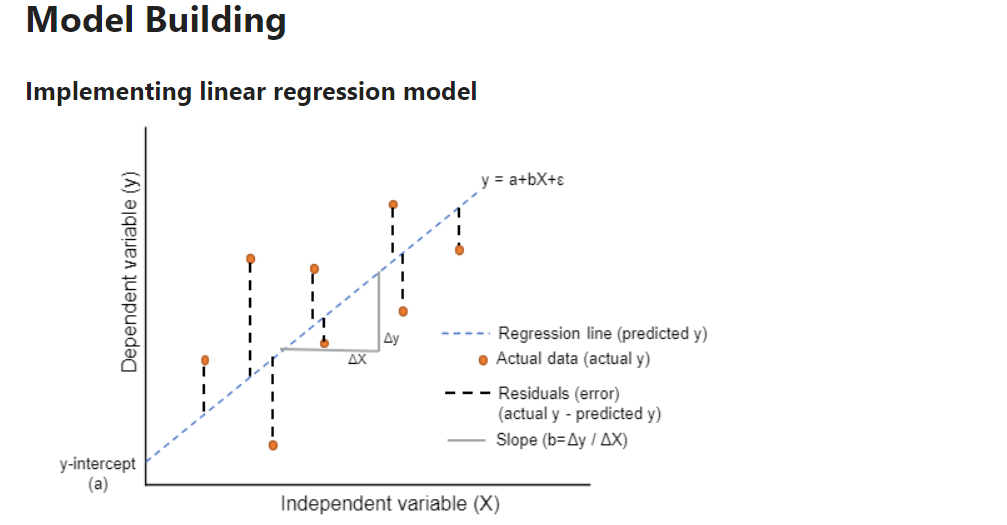

In [ ]:
from sklearn.linear_model import LinearRegression 
# initialize and fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

# function to plot model performance
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_testupper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);


In [ ]:
# function to plot coefficients   
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

In [ ]:
# make predictions
lr_y_pred = lr.predict(X_test)

# evaluate predictions
lr_mae = round(mean_absolute_error(y_test, lr_y_pred),2)
print('mean absolute error: {}\n'.format(lr_mae))
lr_mse = round(mean_squared_error(y_test, lr_y_pred),2)
print('mean squared error: {}\n'.format(lr_mse))
lr_rmse = round(np.sqrt(lr_mse),2)
print('root mean squared error: {}\n'.format(lr_rmse))
lr_r2 = round(r2_score(y_test, lr_y_pred),2)
print('r2_score: {}\n'.format(lr_r2))
lr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(lr_mape))

# Check for homoscadacity
plt.scatter(lr_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

##**Implementing ridge regression**

In [ ]:
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)


     

In [ ]:


# initialize and fit ridge regression
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train, y_train)

In [ ]:
ridge.fit(X_train,y_train)

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:

# make predictions
r_y_pred = ridge.predict(X_test)

# evaluate predictions
r_mae = round(mean_absolute_error(r_y_pred, y_test),2)
print('mean absolute error: {}\n'.format(r_mae))
r_mse = round(mean_squared_error(r_y_pred, y_test),2)
print('mean squared error: {}\n'.format(r_mse))
r_rmse = round(np.sqrt(r_mse),2)
print('root mean squared error: {}\n'.format(r_rmse))
r_r2 = round(r2_score(r_y_pred, y_test),2)
print('r2_score: {}\n'.format(r_r2))
r_mape = round(mean_absolute_percentage_error(r_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(r_mape))

# Check for homoscadacity
plt.scatter(r_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

##**Implementing lasso regression**

In [ ]:

# initialize and fit lasso regression
lasso = LassoCV(cv=tscv)
lasso.fit(X_train, y_train)

In [ ]:

# make predictions
l_y_pred = lasso.predict(X_test)

# evaluate predictions
l_mae = round(mean_absolute_error(y_test, l_y_pred),2)
print('mean absolute error: {}\n'.format(l_mae))
l_mse = round(mean_squared_error(y_test, l_y_pred),2)
print('mean squared error: {}\n'.format(l_mse))
l_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(l_rmse))
l_r2 = round(r2_score(y_test, l_y_pred),2)
print('r2_score: {}\n'.format(l_r2))
l_mape = round(mean_absolute_percentage_error(l_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(l_mape))

# Check for homoscadacity
plt.scatter(l_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

##**Implementing elasticnet regression**

In [ ]:

# initialize and fit elasticnet regression
elasticnet = ElasticNetCV(cv=tscv)
elasticnet.fit(X_train, y_train)



In [ ]:

# make predictions
e_y_pred = elasticnet.predict(X_test)

# evaluate predictions
e_mae = round(mean_absolute_error(y_test, e_y_pred),2)
print('mean absolute error: {}\n'.format(e_mae))
e_mse = round(mean_squared_error(y_test, e_y_pred),2)
print('mean squared error: {}\n'.format(e_mse))
e_rmse = round(np.sqrt(e_mse),2)
print('root mean squared error: {}\n'.format(e_rmse))
e_r2 = round(r2_score(y_test, e_y_pred),2)
print('r2_score: {}\n'.format(e_r2))
e_mape = round(mean_absolute_percentage_error(e_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(e_mape))

# Check for homoscadacity
plt.scatter(e_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

##**Model pipeline**

In [ ]:

# set up the model pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred
     

##**Implementing Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR  

In [ ]:
# initialize and fit random forests regressor
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,150,200],
     'max_depth': [20,30,50,100]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit random forest regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')

In [ ]:

# best fit model
rfr = model.best_estimator_

In [ ]:

# evaluate the model
plotModelResults(rfr, 
                 X_train, 
                 X_test, 
                plot_anomalies=True)

##**Implementing XGBoost Regressor**

In [ ]:
# initialize and fit xgboost regressor
model = XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit XGBoost regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')
     

In [ ]:
# best fit model
xgb = model.best_estimator_

In [ ]:

# evaluate the model
plotModelResults(xgb, 
                 X_train, 
                 X_test, 
                plot_anomalies=True)

In [ ]:

# create dataframe with evaluation metrics
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression',], 'mae':[lr_mae,r_mae,l_mae,e_mae,], 'mse':[lr_mse,r_mse,l_mse,e_mse],'rmse':[lr_rmse,r_rmse,l_rmse,e_rmse],'r2_score':[lr_r2,r_r2,l_r2,e_r2],'mape':[lr_mape,r_mape,l_mape,e_mape]})
model_report

##**Moving Average**
A moving average much better than a naive forecast . A moving average is the average of previous  values.

In [ ]:

# function for calculating moving average

def moving_average(series, n):
  
  """
  Calculate average of last n observation
  """
  
  return round(np.average(series[-n:]),2)

moving_average(df['Close'],12) # prediction for next month closing price using observed previous 12 months data

Unfortunately we can make only one prediction, to make further predictions we need to have the actual observed values. However moving average can be used to identify the trends by smoothing the time series using a pandas implementation DataFrame.rolling(window).mean().*italicized text*

In [ ]:

# # set back up the date column
# df = df.reset_index()
# df['Date'] = df_date

# function for plotting moving average
def ma(series, window, plot_intervals=False):

  """
  series - dataframe column with timeseries
  window - rolling window size
  """

  rolling_mean = series.rolling(window=window).mean()

  plt.figure(figsize=(20,5))
  plt.title('Moving average \n window size = {}'.format(window))
  plt.plot(df['Date'], rolling_mean, "g", label = "Rolling mean trend")
  
  # plotting confidence intervals
  if plot_intervals:
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window] - rolling_mean[window:])
    lower_bound = rolling_mean - (mae + deviation)
    upper_bound = rolling_mean + (mae + deviation)
    plt.plot(df['Date'], lower_bound, "r--", label = "Upper/Lower bounds")
    plt.plot(df['Date'], upper_bound, "r--")
  
  plt.plot(df['Date'], series, label = "Actual values")
  plt.legend(loc="upper left")
  plt.grid(True)
  plt.show()
     

In [ ]:

# plotting 12 months moving average 
ma(df['Close'],12, plot_intervals=True) # smoothing by previous 12 months

In [ ]:


# function that returns weighted moving average
def wma(series, weights):
  """
  calculate weighted moving average of the series
  """
  result = 0.0
  for w in range(len(weights)):
    result += series.iloc[-w-1] * weights[w]
    return float(result)

wma(df['Close'], weights = [0.5, 0.3, 0.2])

##Now let's extend this concept of weighted averages to exponentially weighted moving averages
Exponentially weighted moving averages weights all the available observations while exponentially decreasing the weights as we move back  values 

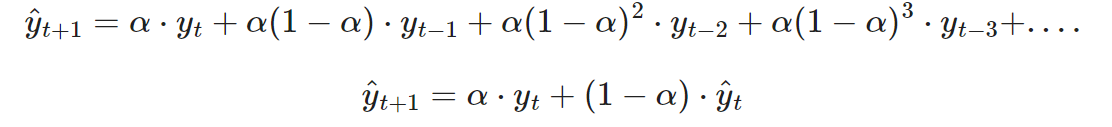

In [ ]:

# function that does exponential smoothing
def exponential_smoothing(series, alpha):
  """
  series - dataframe column with timeseries
  alpha - smoothing parameter
  """
  result = [series[0]]
  for n in range(len(series)):
    result.append(alpha * series[n] + (1 - alpha) * result[n-1])
  return result
     

In [ ]:

# function to plot exponentail moving averages
def ema(series, alphas):
  """
  series - dataframe colummn with time series
  alpha - smoothing parameters
  """
  with plt.style.context('seaborn-white'):
    plt.figure(figsize=(20,5))
    for alpha in alphas:
      plt.plot(exponential_smoothing(series, alpha), label = "Alpha{}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.legend(loc="best")
    plt.grid(True)


In [ ]:

# make prediction
round(exponential_smoothing(df['Close'], alpha=0.2)[-1],2)

In [ ]:
# plot ema
ema(df['Close'], [0.9, 0.5, 0.1])

**Getting rid of non stationarity**

In [ ]:

# function to take lags
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
     

In [ ]:

# plot to check stationarity
tsplot(df['Close'], lags=12)

The autocorrelation function still has too many significant lags. To remove them, we'll subtract the series from itself with lag 1

In [ ]:

# differnce transform
diff = df['Close'] - df['Close'].shift(2)
tsplot(diff[3:], lags=12)
     

ARIMA - Parameters

p: Trend autoregression order 
d: Trend difference order.
q: Trend moving average order.

 - is most probably 2 since it is the last significant lag on the PACF, after which, most others are not significant.
 equals 1 because we had first differences
 should be somewhere around 7 as well as seen on the ACF

In [ ]:

# fit model
model = ARIMA(diff[4:], order=(2,1,7))
model = model.fit()

# summary of fit model
print(model.summary())

# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

###**Conclusion**

**-We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.**

**-A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error**.

**-Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression**.

**-Regression models namely random forest regressor, xgboost regressor and support vector regressor were built.**

**-The time component was brought in and used averaging techniques like moving average, exponentially weighted moving average and double exponentially weighted moving average to do time-series analysis.**

--Presence of non stationarity was detected, made it stationary by taking
lags and difference transformation and built an ARIMA model




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***